### Data Set Information

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. So for our demonstration, we used the Hungarian Reprocessed dataset. The 14 attributes used here are: 

    1. age:      age in years 
    2. sex:      sex (1 = male; 0 = female)  
    3. cp:       chest pain type 
                    -- Value 1: typical angina 
                    -- Value 2: atypical angina 
                    -- Value 3: non-anginal pain 
                    -- Value 4: asymptomatic
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    5. chol:     serum cholestoral in mg/dl
    6. fbs:      (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    7. restecg:  resting electrocardiographic results 
                    -- Value 0: normal 
                    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria    
    8. thalach:   maximum heart rate achieved
    9. exang:     exercise induced angina (1 = yes; 0 = no)
    10. oldpeak:  ST depression induced by exercise relative to rest 
    11. slop:     the slope of the peak exercise ST segment 
                    -- Value 1: upsloping 
                    -- Value 2: flat 
                    -- Value 3: downsloping 
    12. ca:       number of major vessels (0-3) colored by flourosopy
    13. thal:     3 = normal; 6 = fixed defect; 7 = reversable defect
    14. num (the predicted disease type): 
                        -- 0 = none 
                        -- 1 = mild or moderate 
                        -- 2 = moderate or severe 
                        -- 3 = akinesis or dyskmem

### Data Summary

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Loading the data
df=pd.read_csv('heart_disease_hungarian_reprocessed.csv',delimiter=',')
X=np.asarray(data)
X=X[0:294,:]


#### Description

In [335]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num (disease type)
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


#### Data Sample

In [336]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num (disease type)
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


### Exploratory Data Analysis

#### Pairplots

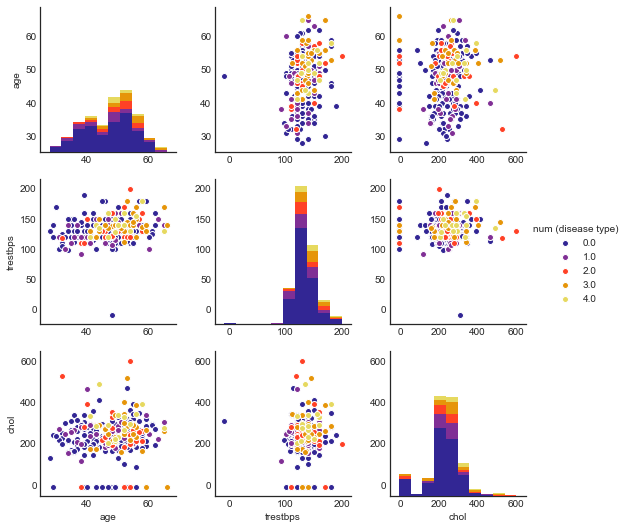

In [362]:

# without regression
sns.pairplot(df.drop(df.index[[294]]), kind="scatter", hue='num (disease type)',
             vars=["age", "trestbps","chol"],palette="CMRmap")
plt.savefig('sns_pairplot.png', dpi=500)
plt.show()



#### Histograms

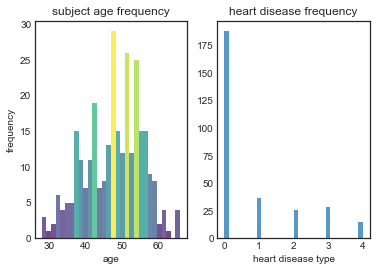

In [338]:
X=np.asarray(df)
X=X[0:294,:]
x=X[:,0]
column_0=X[:,0]
column_13=X[:,13]

plt.subplot(121)
n, bins, patches = plt.hist(column_0, 30, density=False, alpha=0.75)

# We'll color code by height, but you could use any scalar
fracs = n / n.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


plt.xlabel('age')
plt.ylabel('frequency')
plt.title('subject age frequency')


#plotting heart disease frequency plot
plt.subplot(122)
plt.hist(column_13,30, density=False, alpha=0.75)
plt.xlabel('heart disease type')
plt.title('heart disease frequency')

plt.savefig('ag.png',size=(8,6),dpi=500)
plt.show()

#### 2D histrogram ( age vs cholesterol )

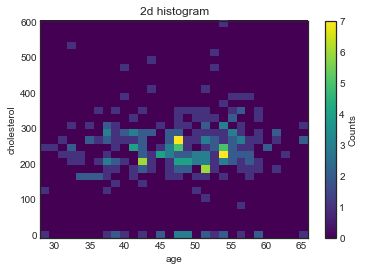

In [339]:
plt.hist2d(column_0, X[:,4], bins=30, cmap='viridis')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.title('2d histogram')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()


#### Density Plot ( cholesterol )

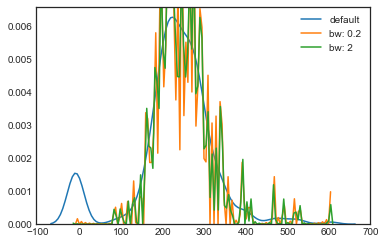

In [340]:
sns.kdeplot(X[:,4],label='default')
sns.kdeplot(X[:,4], bw=.2, label="bw: 0.2")
sns.kdeplot(X[:,4], bw=2, label="bw: 2")
plt.legend()
plt.show()

#### 2D Density Plot (age vs cholesterol)

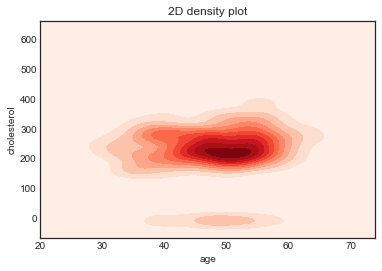

In [341]:
# library & dataset
import seaborn as sns
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(X[:,0], X[:,4], cmap="Reds", shade=True)
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.title('2D density plot')
plt.show()

### Dimensionality Reduction Methods 

#### PCA

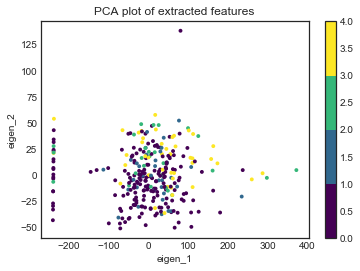

In [342]:
#PCA reduction 
X_total=X[:,0:12]
y_total=X[:,13]

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_total)
target_names=['0','1','2','3']
lw = 2

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_total, edgecolor='none', alpha=1,
           cmap=plt.get_cmap('viridis',4), s=15)

plt.colorbar()
plt.xlabel('eigen_1')
plt.ylabel('eigen_2')
plt.title('PCA plot of extracted features')
plt.show()
# rootdir = 'C:/Users/nafi/Downloads/JAFFE_CAT/Thesis JAFFE_final/Paper/pca_extracted.png'
#plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=12)


#### t-SNE

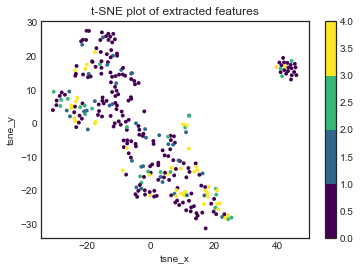

In [352]:
tsne=TSNE(n_components=2,perplexity=20)
tsne_result=tsne.fit_transform(X_total)

target_names=['0','1','2','3']
lw = 2

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_total, edgecolor='none', alpha=1,
           cmap=plt.get_cmap('viridis',4), s=15)

plt.colorbar()
plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.title('t-SNE plot of extracted features')

# rootdir = 'C:/Users/nafi/Downloads/JAFFE_CAT/Thesis JAFFE_final/Paper/pca_extracted.png'
#plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=12)
plt.show()

#### Density plot of PCA and t-SNE

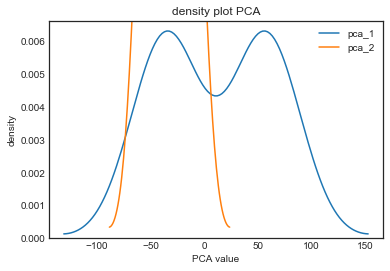

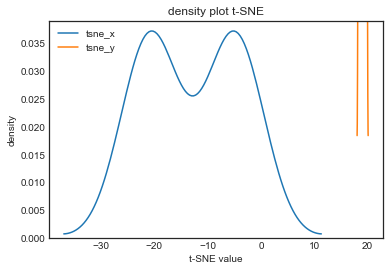

In [344]:
# PCA density 

sns.kdeplot(pca_result[0],label='pca_1')
sns.kdeplot(pca_result[1],label='pca_2')
plt.legend()
plt.xlabel('PCA value')
plt.ylabel('density')
plt.title('density plot PCA')
plt.show()

#t-SNE density
sns.kdeplot(tsne_result[0],label='tsne_x')
sns.kdeplot(tsne_result[1],label='tsne_y')
plt.legend()
plt.xlabel('t-SNE value')
plt.ylabel('density')
plt.title('density plot t-SNE')
plt.show()
